In [1]:
from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
#bs = 64
bs = 32   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [3]:
path = untar_data('E:\\OneDrive\\Doutorado\\Datasets\\art_images\\dataset\\dataset_updated'); type(path)

pathlib.WindowsPath

In [4]:
data = ImageDataBunch.from_folder(path,'train','valid', ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

In [5]:
data

ImageDataBunch;

Train: LabelList (7721 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
drawings,drawings,drawings,drawings,drawings
Path: E:\OneDrive\Doutorado\Datasets\art_images\dataset\dataset_updated;

Valid: LabelList (856 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
drawings,drawings,drawings,drawings,drawings
Path: E:\OneDrive\Doutorado\Datasets\art_images\dataset\dataset_updated;

Test: None

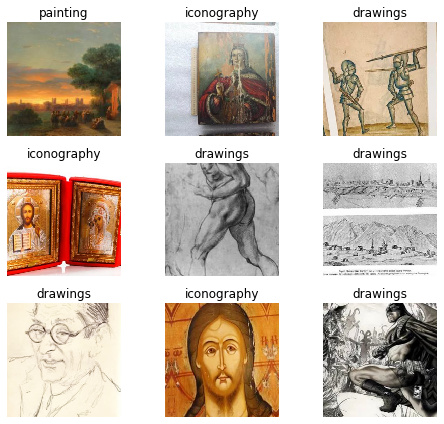

In [6]:
data.show_batch(rows=3, figsize=(7,6))

In [7]:
print(data.classes)
len(data.classes),data.c

['drawings', 'engraving', 'iconography', 'painting', 'sculpture']


(5, 5)

## Initializing model and Training the model

In [8]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [9]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (7721 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
drawings,drawings,drawings,drawings,drawings
Path: E:\OneDrive\Doutorado\Datasets\art_images\dataset\dataset_updated;

Valid: LabelList (856 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
drawings,drawings,drawings,drawings,drawings
Path: E:\OneDrive\Doutorado\Datasets\art_images\dataset\dataset_updated;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, ker

## Results

In [10]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

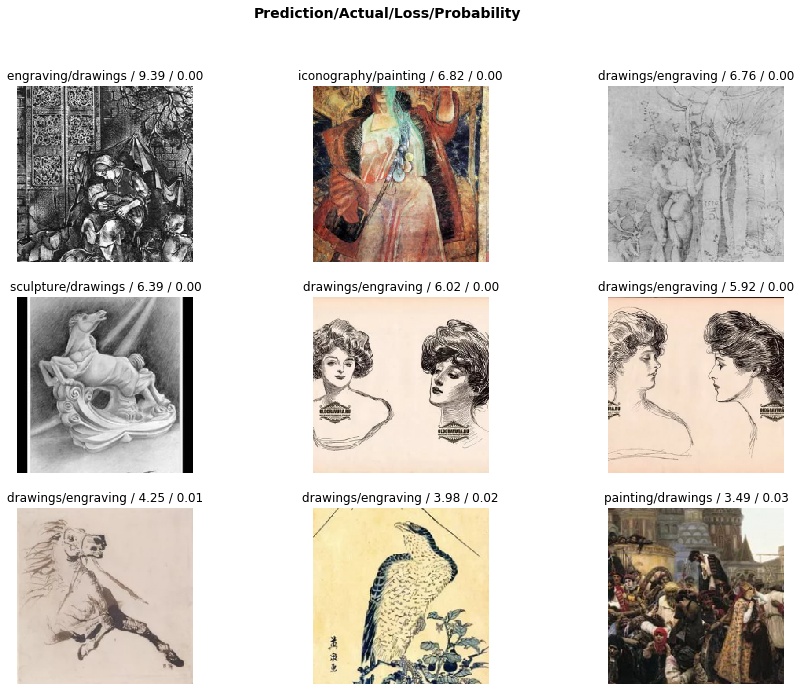

In [24]:
interp.plot_top_losses(9, figsize=(15,11))

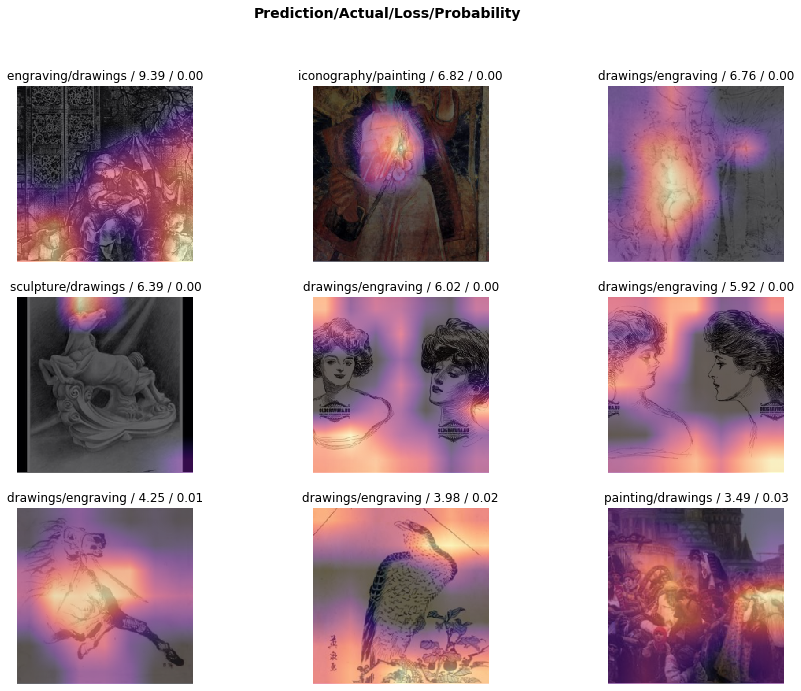

In [14]:
interp.plot_top_losses(9, figsize=(15,11),heatmap=True)

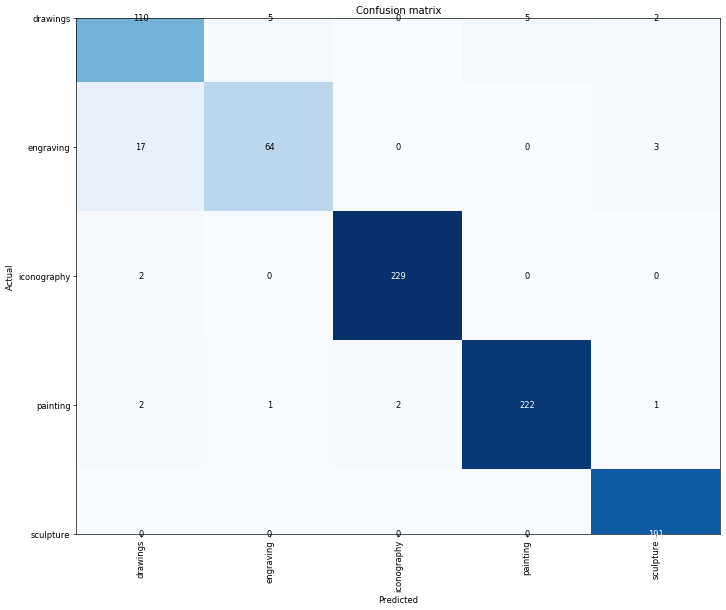

In [12]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [13]:
interp.most_confused(min_val=2)

[('engraving', 'drawings', 17),
 ('drawings', 'engraving', 5),
 ('drawings', 'painting', 5),
 ('engraving', 'sculpture', 3),
 ('drawings', 'sculpture', 2),
 ('iconography', 'drawings', 2),
 ('painting', 'drawings', 2),
 ('painting', 'iconography', 2)]

In [16]:
learn.get_preds()

[tensor([[8.4139e-01, 3.1063e-03, 4.0426e-04, 1.5450e-01, 5.9579e-04],
         [2.4583e-01, 1.6176e-02, 3.4916e-01, 3.8803e-01, 8.0340e-04],
         [9.0904e-01, 7.4075e-03, 1.1260e-04, 4.8350e-02, 3.5085e-02],
         ...,
         [1.3570e-07, 4.0392e-06, 3.7140e-09, 1.6050e-08, 1.0000e+00],
         [4.0283e-07, 3.3063e-08, 1.3963e-09, 1.9255e-07, 1.0000e+00],
         [3.5656e-11, 2.9639e-10, 3.9293e-10, 1.5437e-12, 1.0000e+00]]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [17]:
img = open_image('E:\\OneDrive\\Doutorado\\Cursos\\FastAI_Pierre\\Aula01-23out2019\\atividade\\elefante.jfif')

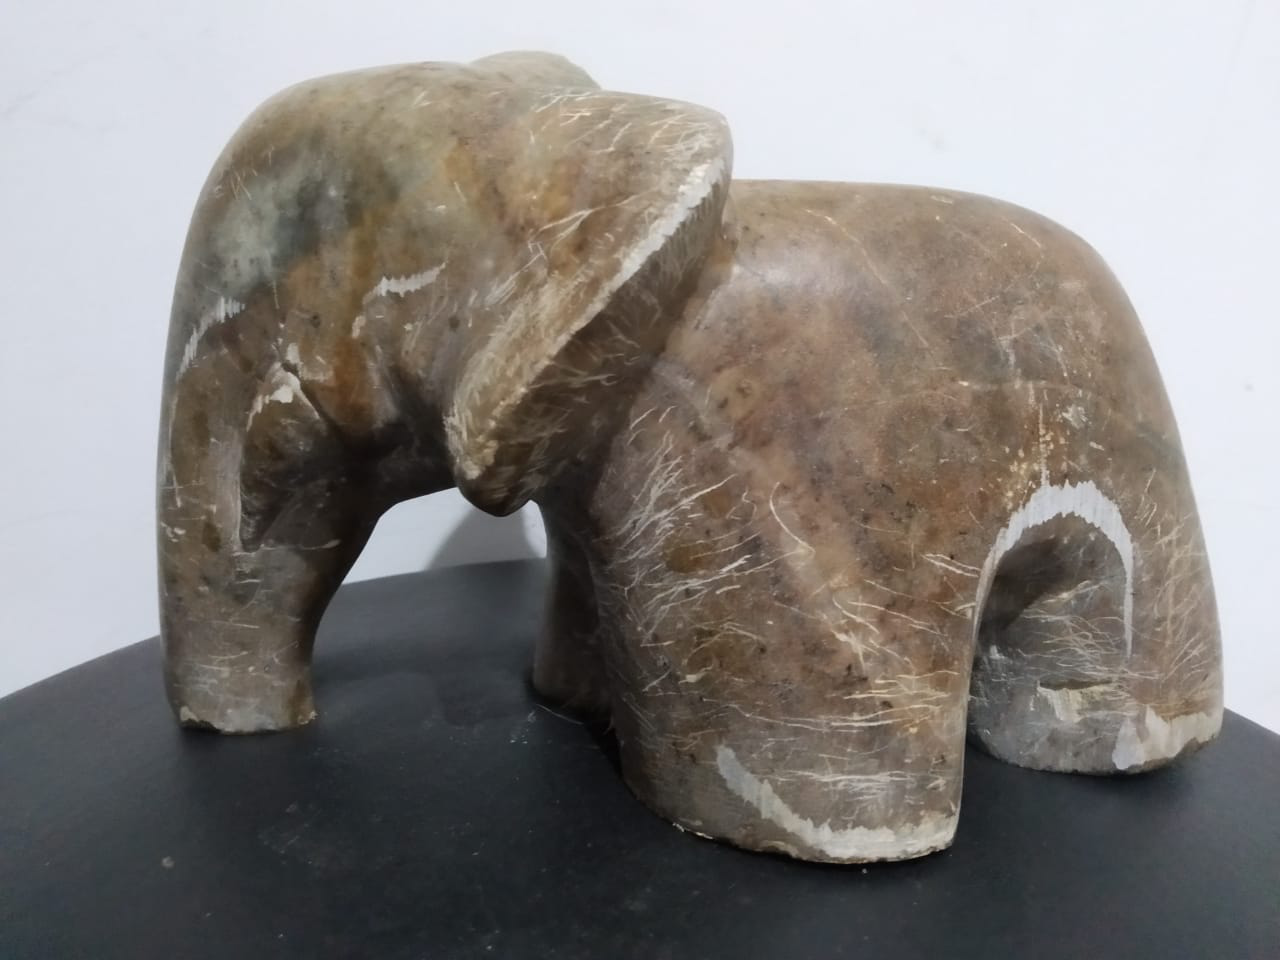

In [20]:
img

In [19]:
learn.predict(img)

(Category sculpture,
 tensor(4),
 tensor([1.4832e-07, 1.5209e-09, 6.7807e-10, 7.0325e-08, 1.0000e+00]))

In [21]:
img2 = open_image('E:\\OneDrive\\Doutorado\\Cursos\\FastAI_Pierre\\Aula01-23out2019\\atividade\\gravura_carlossena.jfif')

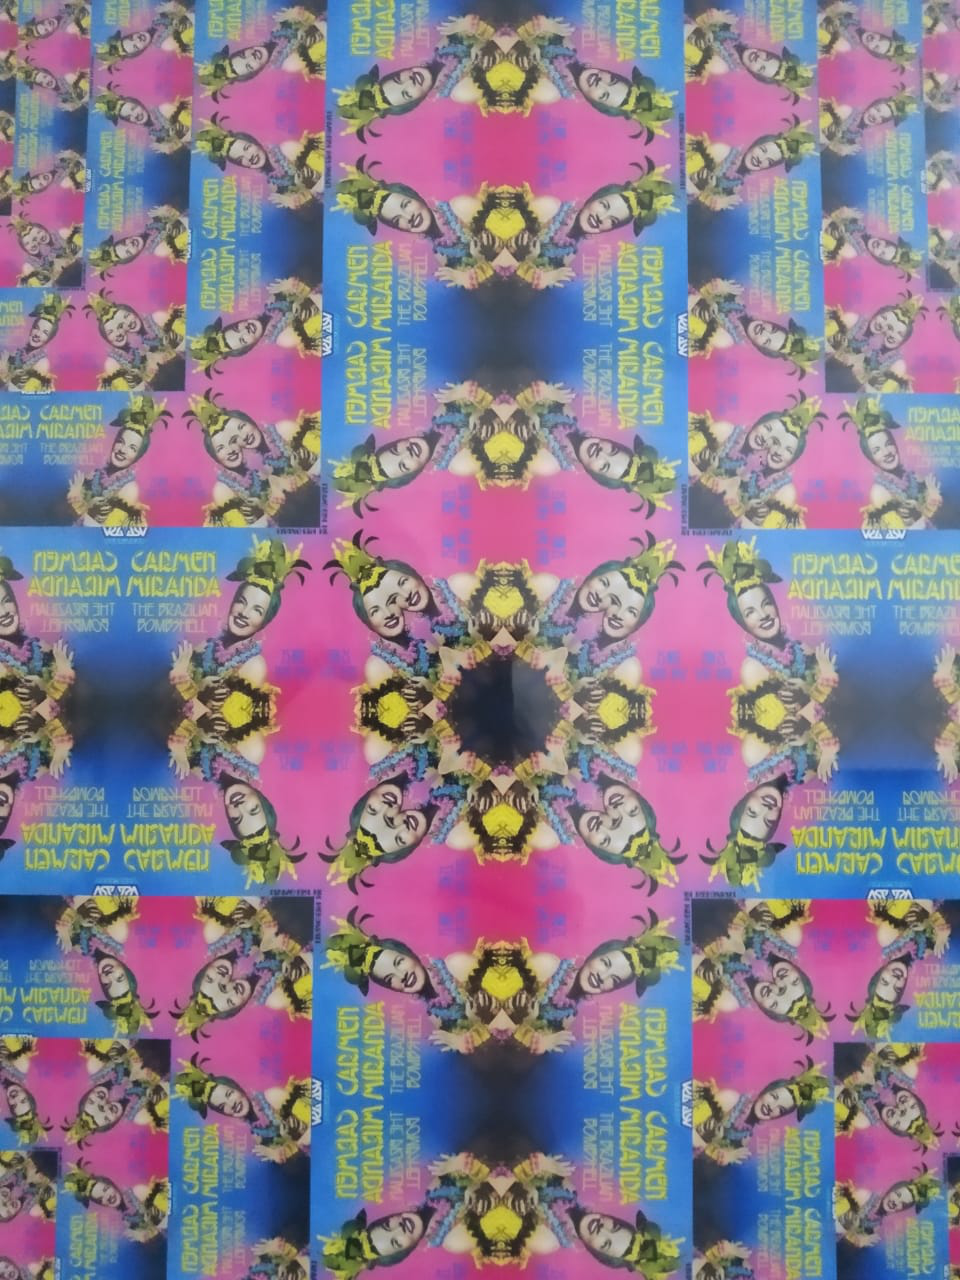

In [22]:
img2

In [23]:
learn.predict(img2)

(Category drawings,
 tensor(0),
 tensor([5.5758e-01, 3.0167e-03, 3.0328e-03, 4.3619e-01, 1.8327e-04]))

In [25]:
print(data.classes)

['drawings', 'engraving', 'iconography', 'painting', 'sculpture']
